<b><mark>EEG DATA ANALYSES COURSE - Groupe 23 (ZIYAD MOHSSINE, ZOGARH MERIEM, OUKASSOU YOUSSEF): Epileptic Seizure Recognition<mark></b><br>
<h1>Emails</h1>
<mark>
ZIYAD Mouhssine:</mark> mouhssine.ziyad@uit.ac.ma
<mark>ZOGARH Meriem:</mark> meriem.zogarh@uit.ac.ma
<mark>OUKASSOU Youssef:</mark> youssef.oukassou@uit.ac.ma




[Link for description of dataset](https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition)<br>
[Research paper](http://users.fs.cvut.cz/ivo.bukovsky/PROJEKT/Data/Realna/BIO/EEG/reference/PRE61907.pdf)<br>
[Kaggle](https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition)

Electroencephalography (EEG) is an electrophysiological monitoring method to record electrical activity of the brain.

### Short description of dataset

|Data Set Characteristics||Attribute Characteristics||Associated Tasks||Number of Instances||Number of Attributes||Missing Values?|
|---||---||---||---||---||---|
|Multivariate, Time-Series||Integer, Real||Classification, Clustering||11500||179||N/A|

### Plan
    - To be introduced with dataset description
    - Change the y target column (make a binary classification task)
    - Remove Unnamed: 0 column (additionaly check the importance of it)
    - EDA + Smart visualisation of data
    - Make pipelines for all the approaches for binary classification task + make a comperison table of results
    ----------------
    - PCA or ICA (from mne) --> reduce size of data
    - Use previous pipelines for reduced data + make a comperison table of results
    - Approaching with mne library
    - Model tuning!!!
    

In [1]:
#THIS IS DEFAULT KAGGLE CELL, WHICH DOWNLOAD OUR DATA TO PATH: /kaggle/input/epileptic-seizure-recognition/Epileptic Seizure Recognition.csv

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

First of all let us import all necessary libraries

In [2]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#import cufflinks
#cufflinks.go_offline()
#cufflinks.set_config_file(world_readable=True, theme='pearl')

#import plotly
#import plotly.figure_factory as ff
#from plotly import tools
#from plotly.offline import init_notebook_mode, iplot

import imblearn


import seaborn as sns

#init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

Let us got to the directory where we have our data (.csv file, named: Epileptic Seizure Recognition.csv)

Or alternatevily read data directly from web application (additionally we can download data locally)

In [4]:
data = pd.read_csv(r'C:\Users\Merry\Downloads\Epileptic-EEG\Epileptic Seizure Recognition.csv')

In [106]:
#Read our data (from Kaggle)
data = pd.read_csv('Epileptic Seizure Recognition.csv')

In [5]:
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,-63,-60,-57,-52,-46,-33,-27,-33,-32,...,-9,-15,-19,-20,-18,-14,0,9,21,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,-52,-67,-96,-123,-143,-155,-167,-176,-185,...,52,57,61,60,54,53,55,62,65,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,90,76,18,5,10,23,48,32,4,...,-43,-48,-44,-22,-17,18,50,45,-9,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6

In [6]:
#Have a look on first five rows
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [7]:
#Have a look on last five rows
data.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,-63,-60,-57,-52,-46,-33,-27,-33,-32,...,-9,-15,-19,-20,-18,-14,0,9,21,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,-52,-67,-96,-123,-143,-155,-167,-176,-185,...,52,57,61,60,54,53,55,62,65,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,90,76,18,5,10,23,48,32,4,...,-43,-48,-44,-22,-17,18,50,45,-9,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,-77,-105,-110,-103,-89,-80,-81,-98,-113,...,-98,-103,-99,-81,-56,-61,-67,-111,-112,-120,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,23,13,11,-3,-5,-9,-14,1,27,60,69,69,50,33,20,15,4,-5,-4,-8,-15,-13,-2,21,39,48,37,10,-23,-47,-71,-80,-74,-59,-44,-30,-17,-3,6,13,...,49,65,64,44,15,-14,-38,-68,-99,-107,-108,-83,-46,0,30,39,44,33,22,8,-13,-33,-61,-70,-75,-74,-58,-18,19,54,71,76,74,65,56,18,-28,-75,-98,-94,-59,-25,-4,2,5,4,-2,2,20,4


In [8]:
#Check dataframe shape (11500 rows and 180 columns(features))
data.shape

(11500, 180)

So, after quick looking we observe weird names of features.<br>
Let us look throught description of features and target (y) feature also.

<b>From data description:</b> we divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.<br>

So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

Let us look more preciesly on <b>y</b> column and it's value's importance for our case.<br>

<b>y</b> contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:
 - 5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open
 - 4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed
 - 3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area
 - 2 - They recorder the EEG from the area where the tumor was located
 - 1 - Recording of seizure activity
All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure.

From the first view we can assume we need to solve **multi-classification task**, but, after accurate exploaring definitions of classes of <b>y</b>, we can realeyes we can *reform* our **multi-classification task** to **binary classification task**.<br>
For that we can just combine {2,3,4,5} classes as 0 class (not epileptic seizure) and keep {1} class as 1 (epileptic seizure).

In [9]:
#Before joining the classes, let us check y values for balancing
data['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

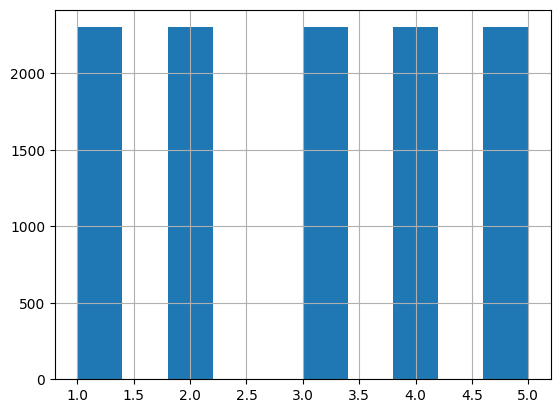

In [10]:
data.y.hist();

By the chance we faced with plotting, let us quickly plot few curves.<br>
As we can observe, it seems we have few types of curves. Let us keep it in our minds and analyse it during further steps.

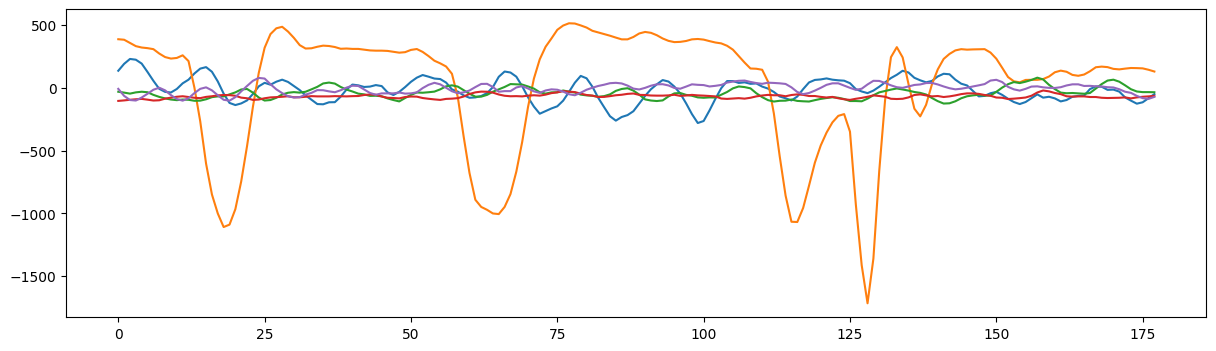

In [11]:
plt.figure(figsize=(50,4))
plt.subplot(131)
[plt.plot(data.values[i][1:-1]) for i in range(5)];

<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition</mark></b><br>
We visualize graphs, each two represent one of the values of the target variable y (ranging from 1 to 5). We observe that the graphs for target values of 2 to 5 follow a pattern, while the graph for the target value of 1 exhibits a disturbance in the pattern of the graph.


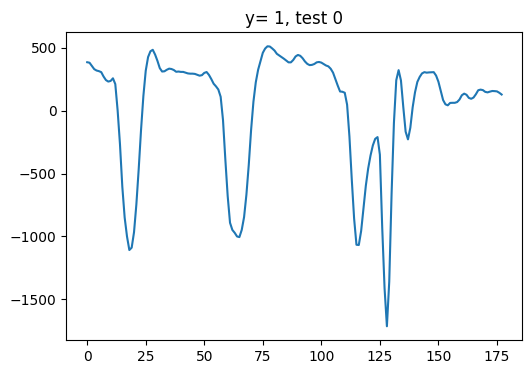

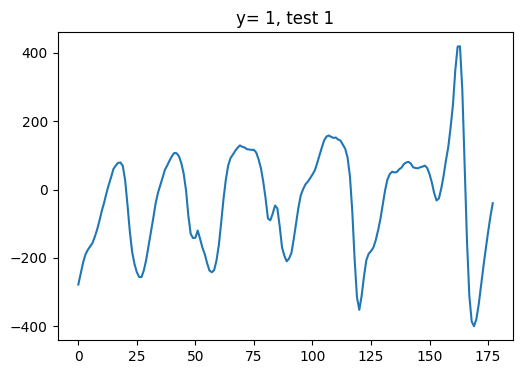

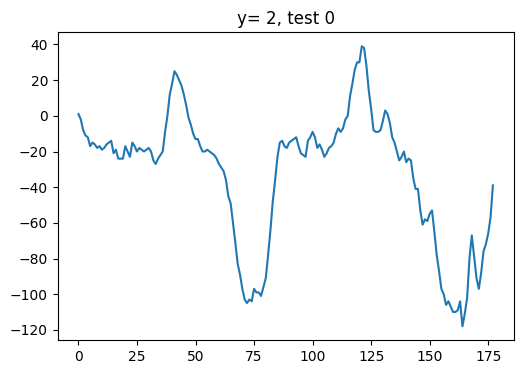

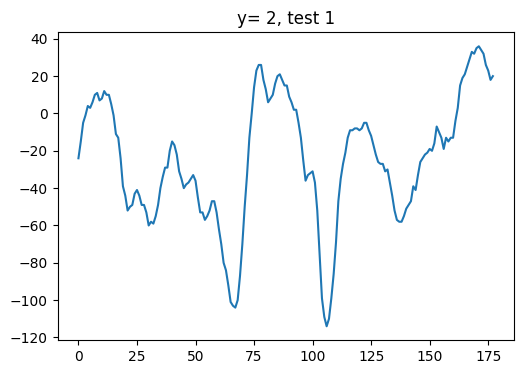

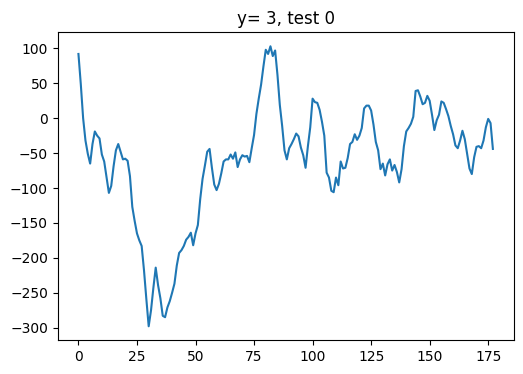

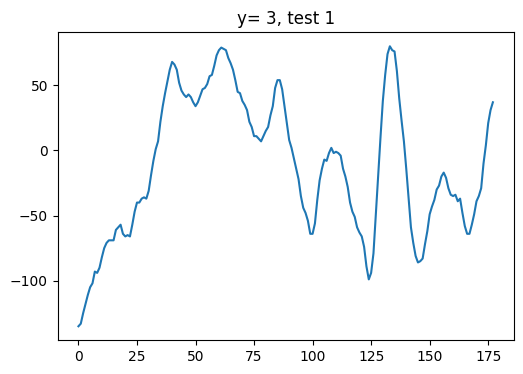

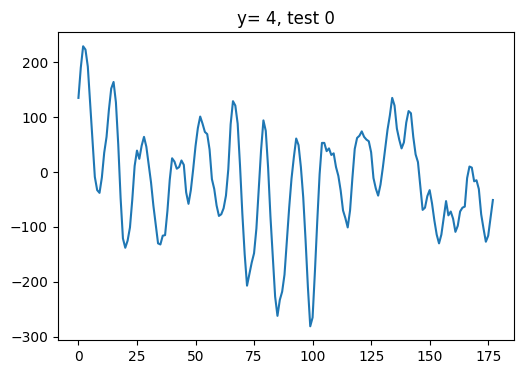

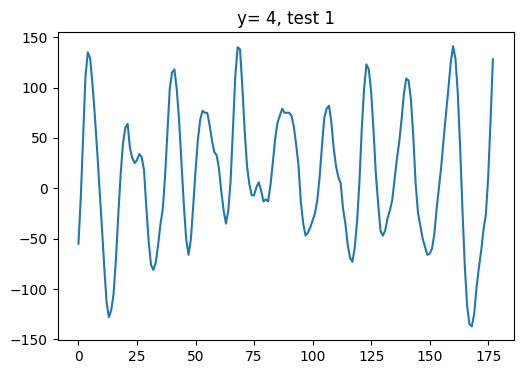

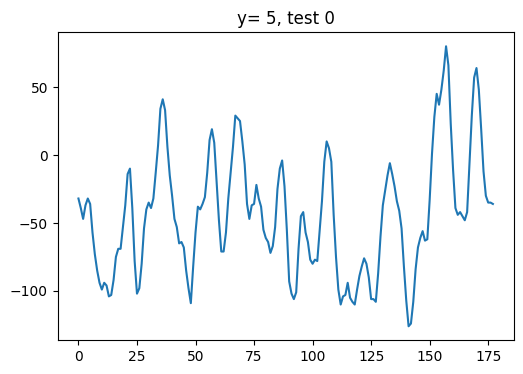

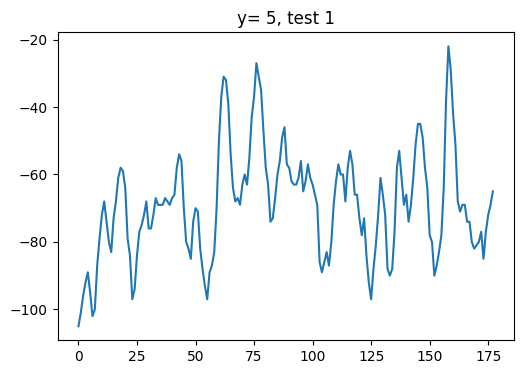

In [14]:
# EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition
for j in [1,2,3,4,5]:
    #print("y=",j)
    data2=data[data['y']==j]
    for i in range(2):
        plt.figure(figsize=(20,4))
        plt.subplot(131)
        plt.plot(data2.values[i][1:-1])
        plt.title("y= {fname}, test {age}".format(fname = j, age = i))

### Change the y target column (make a binary classification task)

<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition</mark></b><br>
The 5 classes are divided into a binary classification, the class 1 (subjects with epileptic seizure) , class 0 (subjects falling in classes 2, 3, 4, and 5 are those who do not have epileptic seizure)

In [15]:
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)

In [16]:
#Check the difference in dataframe in general

#Check which values do we have in y column
print(data['y'].value_counts())

data.head()

y
0    9200
1    2300
Name: count, dtype: int64


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


### "Remove Unnamed" column (it has information which we don't need)

In [17]:
data = data.drop('Unnamed', axis = 1)

### Let us shuffle data because of previous manipulations

In [18]:
data = shuffle(data)

So, for now let us have a look on the description of our data. <br>
We can do it using several approaches:
 - 1) ususal: pd.description(), pd.info()
 - 2) ff.create_table (approach from plotly - in our case unnecessary, but we will use it for interesting)

In [19]:
# table_cat = ff.create_table(data.describe().T, index=True, index_title='Signals')
# iplot(table_cat)

In [20]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,-6.964087,-5.773826,-4.700783,-4.143826,-4.546087,-5.53200,-6.670435,-7.702348,-7.894696,-8.081391,...,-7.629391,-7.373565,-7.439913,-7.592348,-6.897652,-6.000348,-5.423913,-5.151043,-5.586870,-6.281478,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,161.197812,158.045513,157.490904,160.163082,163.996955,167.74431,171.232021,171.484787,169.299229,166.255922,...,158.301750,157.214361,158.679911,160.183325,162.002986,164.260512,166.182755,167.154785,167.414376,168.020316,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,

In [21]:
data1=data[data['y']==1]
data0=data[data['y']==0]
data0.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.00000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.00000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,...,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.0
mean,-8.992609,-8.877174,-8.910435,-8.969783,-9.085326,-9.436848,-9.852500,-10.215326,-10.292717,-10.404022,-10.364565,-10.201630,-9.79587,-9.366739,-8.933370,-8.571413,-8.110217,-7.871304,-7.634674,-7.685000,-7.745000,-7.812935,-7.992174,-8.290000,-8.378152,-8.378043,-8.050217,-7.779565,-7.553696,-7.651304,-7.742609,-7.641957,-7.458261,-7.323913,-7.160978,-7.063370,-7.102391,-7.456304,-7.752391,-7.936196,-8.071957,-8.32337,-8.352717,-8.153696,-7.920435,-7.616957,-7.403152,-7.395761,-7.201196,-7.135543,...,-8.833587,-8.579891,-8.307826,-8.058913,-7.681413,-7.386087,-7.239239,-7.140870,-7.196304,-7.411087,-7.890000,-8.027174,-8.350326,-8.290217,-8.423043,-8.690543,-9.045326,-9.238478,-9.442391,-9.456848,-9.297609,-8.963043,-8.554674,-8.420870,-8.397500,-8.543696,-8.616848,-8.699457,-8.817174,-8.752500,-8.733261,-8.816522,-9.101304,-9.475978,-9.708370,-9.874891,-9.836196,-10.008587,-9.954783,-10.056957,-10.253478,-10.560543,-10.583587,-10.479891,-10.148696,-9.848587,-9.620435,-9.395435,-9.240435,0.0
std,70.455286,70.560110,70.372582,70.030409,69.377958,69.291403,69.555105,69.635977,69.139111,68.502271,68.039712,67.707075,67.87930,68.155359,68.105652,67.985931,67.778565,67.839717,68.593492,69.916108,70.574751,70.318706,69.693689,68.638105,67.899185,67.595766,66.763455,65.973156,64.885648,64.244725,64.152115,64.853603,65.808491,66.125886,65.689990,64.814245,64.301839,64.610141,65.066122,65.347316,64.872731,64.26981,63.581363,63.630408,64.310165,65.418497,67.549298,69.788325,70.551500,70.234060,...,68.163225,69.541359,71.719118,73.470566,75.007196,75.945526,76.847097,77.251285,76.352874,75.591411,75.892771,76.642447,77.640952,78.413501,77.956269,77.705528,77.045022,76.638563,75.126036,73.163762,71.448877,70.240233,69.054315,68.287824,67.347611,66.325524,65.528370,64.938860,64.664958,64.679244,64.799435,64.793998,64.742012,64.902284,66.162189,68.300686,69.655027,70.112188,70.092532,69.856421,68.825267,68.028089,67.878426,68.128134,68.868079,69.550894,70.353607,70.934300,71.185850,0.0
min,-566.000000,-609.000000,-594.000000,-549.000000,-603.000000,-801.000000,-956.000000,-1092.000000,-784.000000,-769.000000,-746.000000,-680.000000,-590.00000,-541.000000,-551.000000,-502.000000,-440.000000,-475.000000,-577.000000,-637.000000,-681.000000,-600.000000,-407.000000,-431.000000,-480.000000,-835.000000,-725.000000,-802.000000,-

In [22]:
data1.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.0
mean,-21.936522,-19.049130,-15.293913,-9.836087,-3.707391,2.730000,6.899565,7.425652,8.380870,10.773913,12.320870,10.595652,5.746957,2.022609,-0.322609,-1.155652,-1.592609,-2.238261,-1.885217,-1.502174,-0.796957,-1.463913,-2.453043,-1.256087,2.918261,7.716522,8.272609,6.744348,3.246957,0.927826,-0.779130,-0.494783,0.533913,2.796522,3.865652,1.863043,-2.401739,-6.757826,-8.983043,-7.349565,-2.532609,4.424348,9.906957,11.895652,8.951304,2.807826,-3.739565,-8.928696,-10.668696,-11.864783,...,-2.812609,-2.548261,-3.968261,-5.726087,-3.762609,-0.457391,1.837391,2.808261,0.850870,-1.763043,-3.426522,-4.588261,-6.156522,-7.725652,-9.352174,-8.128261,-5.018696,-1.503043,0.986957,1.683478,2.286087,2.068261,2.442174,1.564348,1.263913,2.592609,5.427391,8.518261,11.858261,11.816957,11.081739,7.011739,0.553478,-5.895217,-10.090435,-10.981739,-9.870000,-8.474348,-6.937826,-7.266522,-9.714783,-15.909565,-22.383043,-26.424783,-26.221739,-25.830870,-25.043913,-24.548261,-24.016522,1.0
std,342.361939,343.398782,337.489643,332.354833,332.211163,332.941638,332.899545,334.375084,334.534814,331.071853,331.457399,333.545828,343.016073,352.845207,356.405884,352.418195,342.306078,336.046004,336.660527,335.003081,335.611359,338.468809,343.670733,344.894988,342.276597,337.688197,338.649473,343.886374,346.237222,344.138040,341.547251,341.594914,341.216080,338.492564,334.644139,334.482642,340.788548,348.590031,348.439847,343.922692,336.310793,329.055461,328.051211,334.340211,343.140482,351.466702,358.308126,357.206452,351.332945,344.234833,...,326.681562,322.870486,324.567509,326.703284,329.767419,334.421416,338.283967,340.285424,341.772073,343.968047,345.053806,344.632625,341.242372,339.976101,341.646029,342.737871,342.173231,339.866652,338.562516,343.793904,347.704006,347.021952,342.194028,340.876133,346.382180,351.723308,349.665910,348.510355,351.207606,355.647720,358.502029,359.089642,352.940981,349.749363,349.253377,349.419208,346.498518,346.304455,345.211701,342.095308,341.534693,345.740615,351.503084,351.184524,347.475865,339.650467,335.747017,335.244512,339.819309,0.0
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.000000,-1840.000000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-176

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, 8042 to 4200
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8 MB


<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition</mark></b><br>
<h3>To visualize the description of each of the two classes 0 and 1<br>we divided the data into 2 sections data0 for class 0 (subjects with no seizures) and data1 for class 1 (subjects with seizures). <br>We then generate 3 different graphs to compare the characteristics of the two classes (min, max, mean) <br>through the graphs we can see the difference in the minimum and the mean between the two classes.</h3>


In [24]:
#EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition
min1=min2=max1=max2=mean1=mean2=0
for col in data1.columns:
    min1+=data1[col].min()
    max1+=data1[col].max()
    mean1+=data1[col].mean()
    min2+=data0[col].min()
    max2+=data0[col].max()
    mean2+=data0[col].mean()

min1/=len(data1.columns)
max1/=len(data1.columns)
mean1/=len(data1.columns)
min2/=len(data0.columns)
max2/=len(data0.columns)
mean2/=len(data0.columns)

In [25]:
#EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition
d1=[min1,max1,mean1]
d2=[min2,max2,mean2]

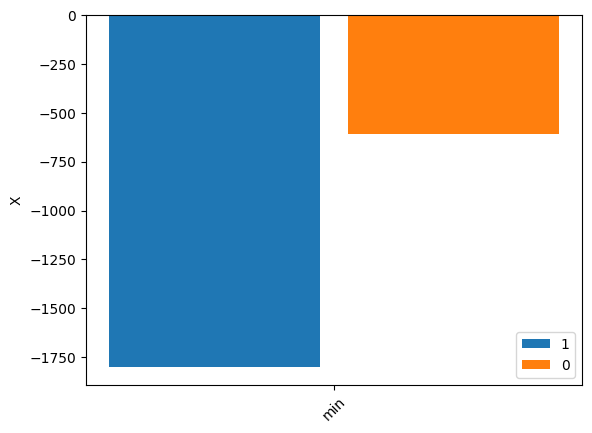

In [26]:
#EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition
i=0
x = np.arange(1)
width = 0.3
val_mae = d1[i]
test_mae = d2[i]

plt.ylabel('X')
plt.bar(x - 0.17, val_mae, width, label='1')
plt.bar(x + 0.17, test_mae, width, label='0')
plt.xticks(ticks=x, labels=["min"],
        rotation=45)
_ = plt.legend()

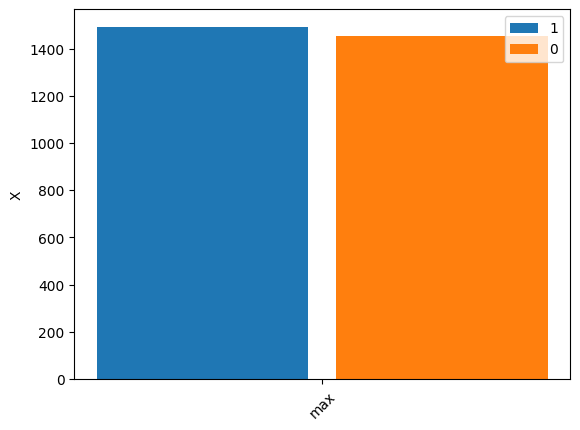

In [27]:
#EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition
i=1
x = np.arange(1)
width = 0.3
val_mae = d1[i]
test_mae = d2[i]

plt.ylabel('X')
plt.bar(x - 0.17, val_mae, width, label='1')
plt.bar(x + 0.17, test_mae, width, label='0')
plt.xticks(ticks=x, labels=["max"],
        rotation=45)
_ = plt.legend()

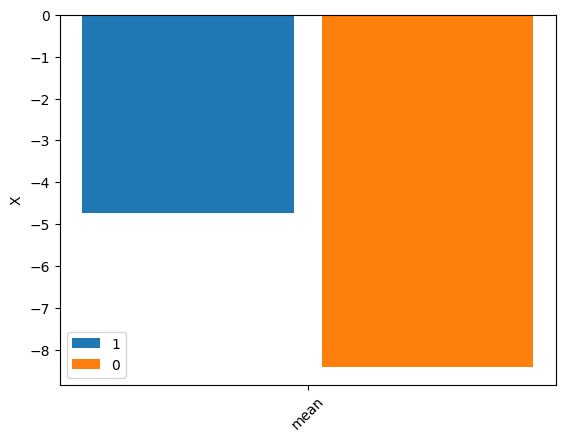

In [28]:
#EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition
i=2
x = np.arange(1)
width = 0.3
val_mae = d1[i]
test_mae = d2[i]

plt.ylabel('X')
plt.bar(x - 0.17, val_mae, width, label='1')
plt.bar(x + 0.17, test_mae, width, label='0')
plt.xticks(ticks=x, labels=["mean"],
        rotation=45)
_ = plt.legend()

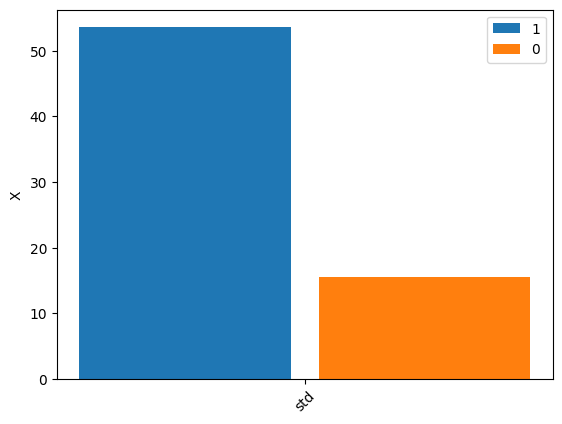

In [29]:
#EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition
#Visualization of the comparison between the std values of the two classes (epileptic and non epileptic),
#the std value provides a single value that represents how spread out the data points are from the mean or average value
std2=(data[data['y'] == 0].describe().std()).std()
std1=(data[data['y'] == 1].describe().std()).std()

i=2
x = np.arange(1)
width = 0.3
val_mae = std1
test_mae = std2

plt.ylabel('X')
plt.bar(x - 0.17, val_mae, width, label='1')
plt.bar(x + 0.17, test_mae, width, label='0')
plt.xticks(ticks=x, labels=["std"],
        rotation=45)
_ = plt.legend()

Let us go further:

In [30]:
#Let us group all the Epileptic occureses and Non Epileptic
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(data[data['y'] == 0]), len(data[data['y'] == 1])))

Number of records of Non Epileptic 9200 VS Epilepttic 2300


In [31]:
#Description of Non Epileptic
data[data['y'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0


In [32]:
#Description of Epileptic

data[data['y'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


In [33]:
print('Totall Mean VALUE for Epiletic: {}'.format((data[data['y'] == 1].describe().mean()).mean()))
print('Totall Std VALUE for Epiletic: {}'.format((data[data['y'] == 1].describe().std()).std()))

Totall Mean VALUE for Epiletic: 290.129360958884
Totall Std VALUE for Epiletic: 53.56315864740058


In [34]:
print('Totall Mean VALUE for NON Epiletic: {}'.format((data[data['y'] == 0].describe().mean()).mean()))
print('Totall Std VALUE for NON Epiletic: {}'.format((data[data['y'] == 0].describe().std()).std()))

Totall Mean VALUE for NON Epiletic: 1260.098927262616
Totall Std VALUE for NON Epiletic: 15.561044289100993


We can see quiet big difference, probably, we wiil demand to normalize/scale our data. 

### Let us plot and have a look on EPILIPTIC and NOT EPILETTIC occureses

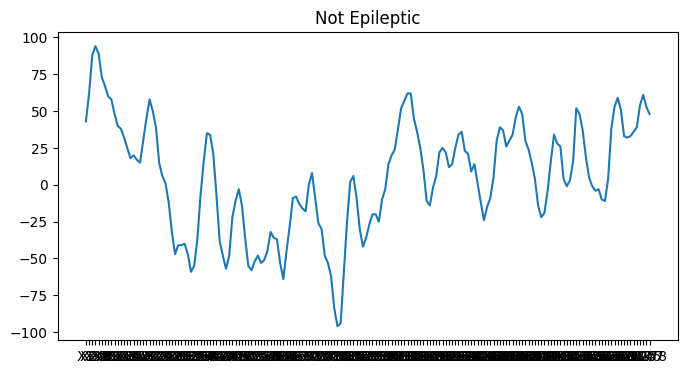

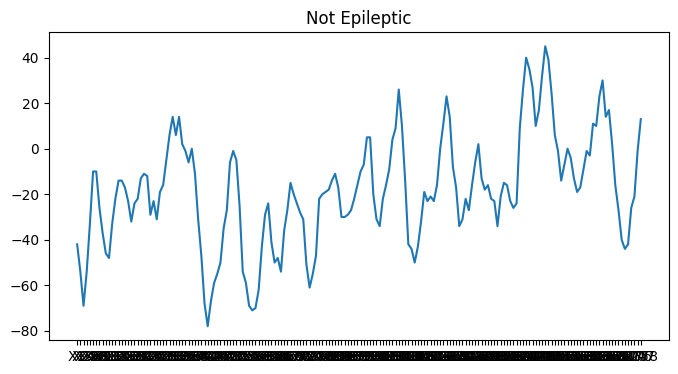

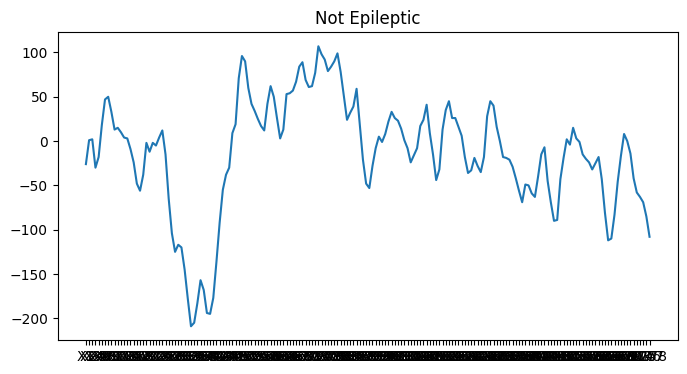

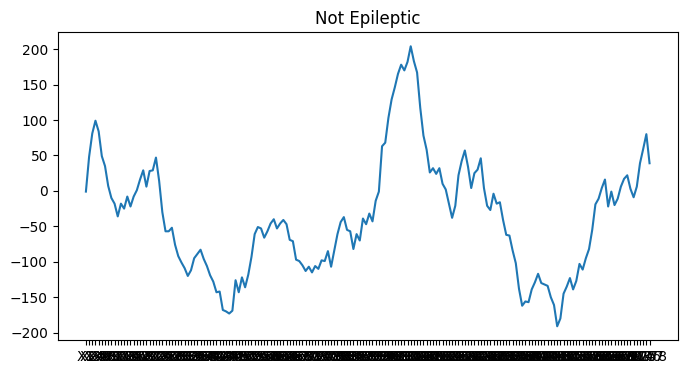

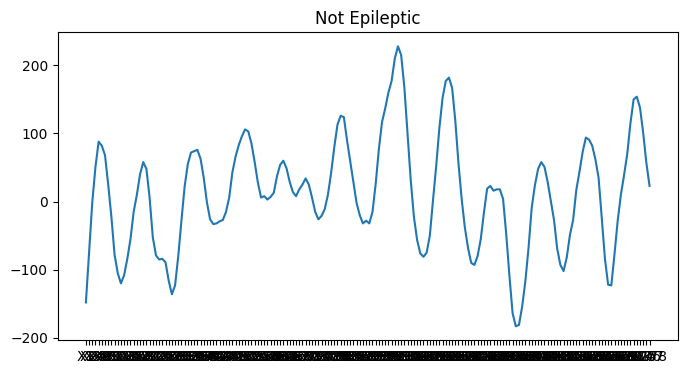

In [35]:
#Few cases of Not Epileptic case
[(plt.figure(figsize=(8,4)), plt.title('Not Epileptic'), plt.plot(data[data['y'] == 0].iloc[i][0:-1])) for i in range(5)];

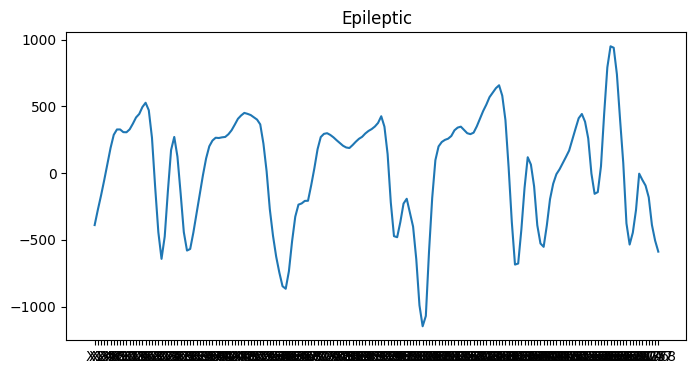

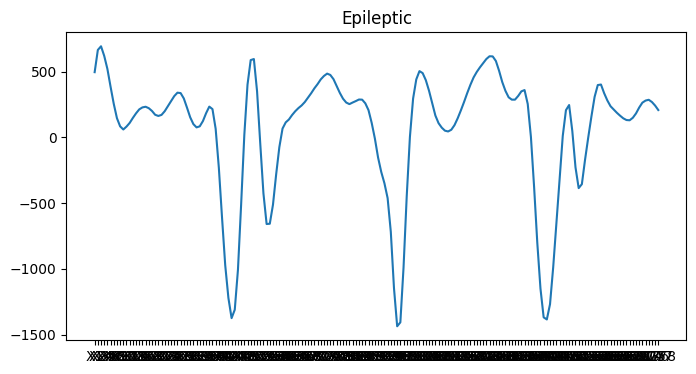

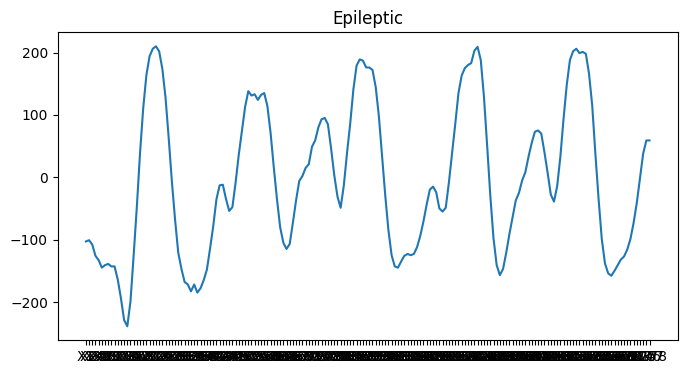

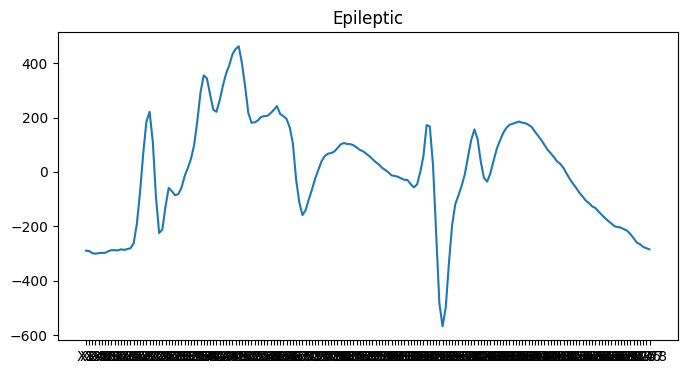

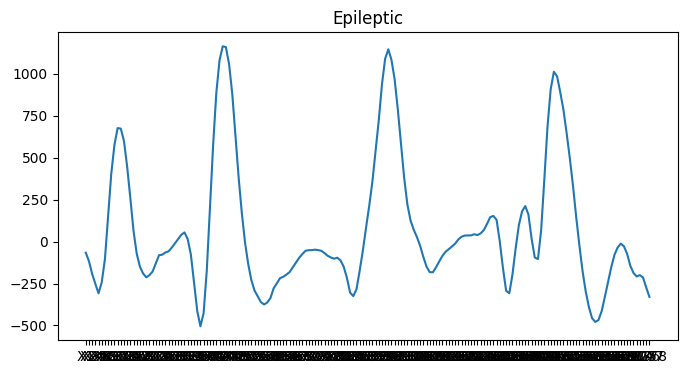

In [36]:
#Few cases of Epileptic case
[(plt.figure(figsize=(8,4)), plt.title('Epileptic'), plt.plot(data[data['y'] == 1].iloc[i][0:-1])) for i in range(5)];

So, as we can observe, records of Epileptic seusizes are more smooth and looks like have a tendency.

### Let us make a scatter plot of values for Epiletpic and Not Epileptic occureses

<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition</mark></b><br>
<h3>The scatter plot graph provides a visualization of the distribution of data points from the two classes using their maximum and minimum values as coordinates. The blue dots represent the "Not Epileptic" class, while the red dots represent the "Epileptic" class.</h3>

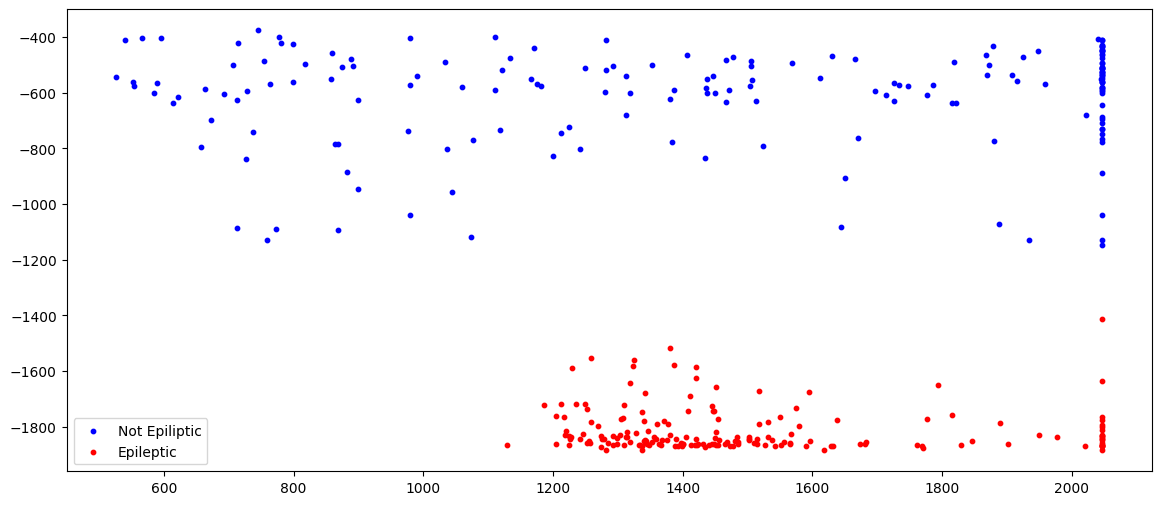

In [37]:
#lists of arrays containing all data without y column
not_epileptic = [data[data['y']==0].iloc[:, range(0, len(data.columns)-1)].values]
epileptic = [data[data['y']==1].iloc[:, range(0, len(data.columns)-1)].values]

#We will create and calculate 2d indicators in order plot data in 2 dimensions;

def indic(data):
    """Indicators can be different. In our case we use just min and max values
    Additionally, it can be mean and std or another combination of indicators"""
    max = np.max(data, axis=1)
    min = np.min(data, axis=1)
    return max, min

x1,y1 = indic(not_epileptic)
x2,y2 = indic(epileptic)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', label='Not Epiliptic')
ax1.scatter(x2, y2, s=10, c='r', label='Epileptic')
plt.legend(loc='lower left');
plt.show()

In [38]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
8042,-389,-275,-168,-53,67,189,287,327,327,307,306,328,370,417,443,495,527,471,265,-104,-442,-642,-475,-134,173,271,123,-152,-442,-580,-568,-445,-301,-156,-16,110,201,244,265,263,268,271,291,321,363,407,432,451,444,435,...,397,43,-366,-685,-677,-423,-111,119,64,-99,-390,-527,-552,-391,-195,-79,-8,29,75,121,169,251,332,411,443,385,260,-3,-155,-142,51,444,792,950,939,741,401,76,-376,-535,-446,-276,-4,-51,-93,-181,-388,-505,-588,1
7917,43,62,88,94,89,73,67,60,58,48,40,38,32,25,18,20,17,15,30,45,58,50,39,15,6,1,-12,-32,-47,-41,-41,-40,-47,-59,-55,-37,-7,16,35,34,21,-7,-38,-48,-57,-48,-22,-11,-3,-14,...,30,39,37,26,30,34,46,53,48,30,24,15,4,-14,-22,-19,-4,16,34,28,26,4,-1,3,16,52,48,37,19,5,-1,-4,-3,-10,-11,4,38,53,59,51,33,32,33,36,39,54,61,53,48,0
11143,-42,-54,-69,-54,-33,-10,-10,-26,-37,-46,-48,-33,-22,-14,-14,-17,-23,-32,-24,-22,-13,-11,-12,-29,-23,-31,-19,-16,-5,6,14,6,14,2,-1,-6,0,-11,-31,-47,-68,-78,-67,-59,-55,-50,-35,-27,-6,-1,...,-16,-22,-23,-34,-21,-15,-16,-23,-26,-24,9,26,40,35,27,10,17,32,45,39,24,6,-1,-14,-7,0,-4,-13,-19,-17,-9,-1,-3,11,10,23,30,14,17,2,-16,-27,-40,-44,-42,-26,-21,-1,13,0
10440,-26,1,2,-30,-18,18,47,50,33,13,15,10,4,3,-9,-24,-48,-56,-38,-2,-12,-2,-5,4,12,-15,-65,-104,-125,-117,-120,-145,-178,-209,-205,-183,-157,-168,-194,-195,-177,-136,-92,-55,-38,-30,9,19,71,96,...,16,0,-18,-19,-21,-29,-42,-56,-69,-49,-50,-59,-63,-40,-15,-7,-45,-69,-90,-89,-43,-19,2,-4,15,3,-1,-15,-20,-24,-32,-25,-18,-43,-81,-112,-110,-83,-46,-17,8,0,-14,-42,-58,-63,-69,-85,-108,0
11164,496,665,693,620,521,385,255,146,84,60,82,110,148,183,213,228,233,222,201,172,163,171,199,238,276,314,340,337,296,226,153,101,76,84,124,184,234,215,65,-231,-610,-972,-1221,-1375,-1311,-1007,-510,18,401,588,...,354,305,287,287,315,350,360,254,4,-377,-801,-1150,-1369,-1385,-1269,-987,-653,-310,11,207,246,48,-228,-386,-356,-170,-1,159,308,398,402,336,281,237,212,187,165,145,132,130,149,182,227,264,280,286,269,242,208,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,-31,-49,-74,-99,-105,-83,-64,-28,-6,8,10,7,2,2,16,21,23,7,-3,-30,-39,-27,-6,-1,-11,-31,-55,-66,-66,-62,-53,-40,-28,-37,-36,-32,-30,-36,-39,-39,-39,-39,-49,-55,-62,-55,-57,-62,-78,-89,...,-68,-68,-60,-43,-60,-76,-85,-56,-28,-22,-37,-62,-72,-69,-46,-32,-22,-6,8,19,21,5,-30,-57,-65,-55,-43,-49,-61,-83,-89,-68,-45,-26,-22,-26,-17,-9,7,8,-15,-35,-57,-79,-89,-93,-94,-90,-68,0
851,37,108,174,201,201,191,172,148,128,114,108,102,92,98,116,138,156,153,120,56,7,-42,-42,-53,-61,-69,-80,-82,-81,-79,-79,-82,-90,-107,-115,-118,-110,-98,-83,-79,-88,-103,-113,-117,-120,-112,-101,-92,-100,-107,...,-217,-197,-157,-127,-101,-93,-91,-86,-82,-74,-71,-69,-74,-85,-92,-102,-96,-89,-88,-88,-84,-62,-48,-41,-43,-43,-43,-43,-52,-57,-61,-52,-52,-58,-64,-76,-87,-100,-114,-114,-111,-101,-91,-83,-75,-72,-72,-75,-70,0
5774,-30,-73,-100,-106,-96,-81,-65,-61,-51,-23,-10,16,15,-6,-34,-78,-88,-83,-84,-74,-69,-55,-49,-55,-32,-16,-15,-6,-6,-12,-24,-38,-50,-51,-40,-41,-23,-10,5,-3,-12,-1,-11,-29,-20,0,-1,1,11,-3,...,-59,-90,-103,-82,-86,-77,-62,-63,-54,-28,-9,-3,-22,-40,-46,-37,-13,-6,-12,9,34,26,11,1,-15,-54,-82,-75,-54,-30,-42,-51,-35,-53,-58,-67,-74,-78,-89,-95,-91,-57,-29,-8,-14,-21,-17,-21,-40,0
10080,-13,-8,-11,-9,-9,-10,-16,-21,-16,-

<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition<mark></b><br>
<h3>To get a better visual of the scatter plot of the two classes, we do the same work by dividing the classes into two graphs (epileptic, not epileptic)</h3>

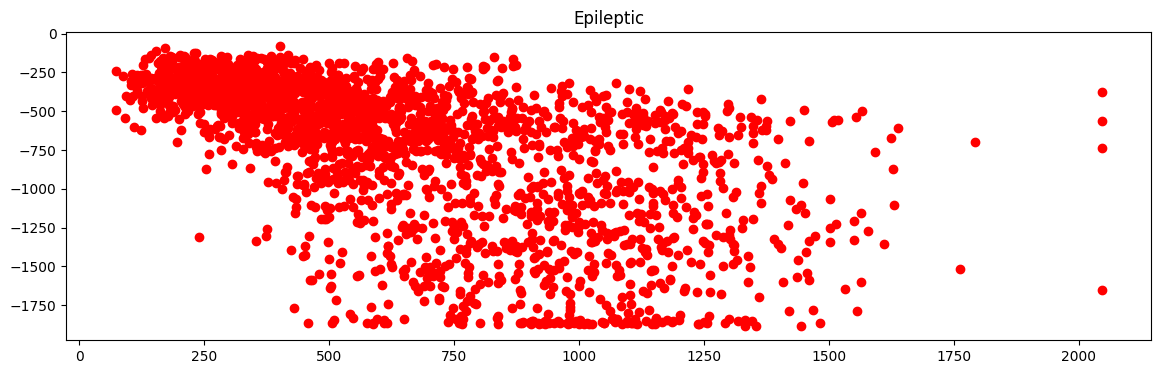

In [39]:
#Just Epileptic
x,y = indic(data[data['y']==1].iloc[:, range(0, len(data.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('Epileptic')
plt.scatter(x, y, c='r');

In [40]:
range(0, len(data.columns)-1)

range(0, 178)

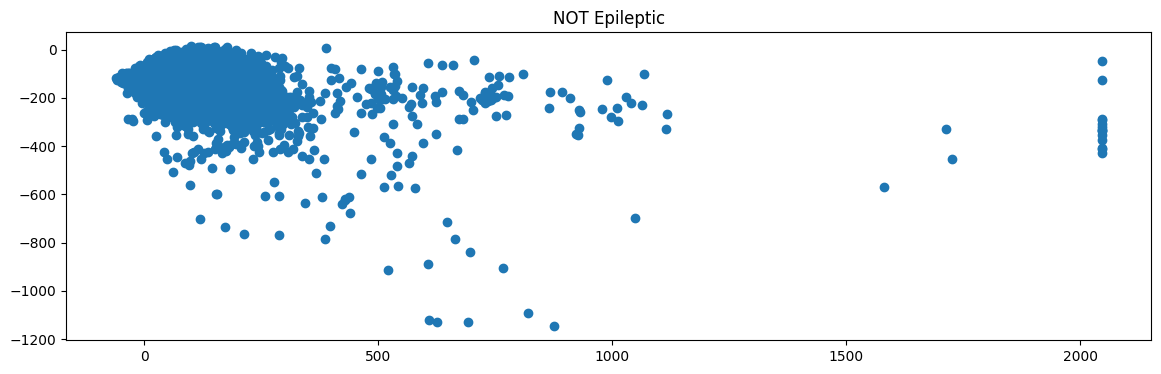

In [41]:
#Just Not Epileptic
x,y = indic(data[data['y']==0].iloc[:, range(0, len(data.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('NOT Epileptic')
plt.scatter(x, y);

### After all, let us go further with ML models. 

As we realyesed earlier, we can try to normalize data. Let us do it. But before that we will use undersampling approach in order to prevent imbalanced issue

<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition<mark></b><br>
<h3>In this code we noticed that they used an oversampling method ( increasing the number of instances in the minority class by generating synthetic samples or replicating existing samples) in order to balance the data (the number of subjects with epilepsy and with no epilepsy are equal).
<br><br>
We split our data into 2 parts, 80% in which we will be applying the oversampling method, and 20 % kept away for testing, in order to make sure that this method does not affect the accuracy of models.<h3>


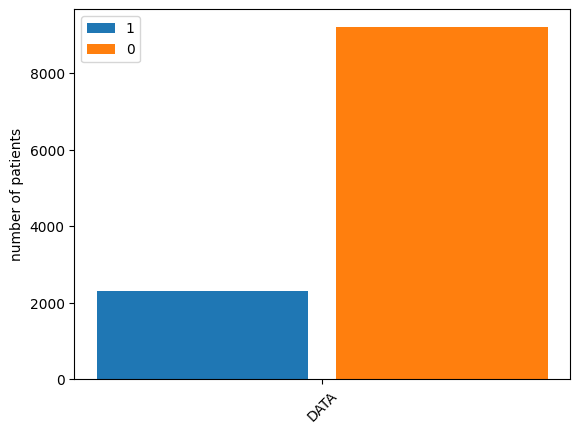

In [42]:
#EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition
# Data before oversampling
x = np.arange(1)
width = 0.3
val_mae = 2300
test_mae = 9200

plt.ylabel('number of patients')
plt.bar(x - 0.17, val_mae, width, label='1')
plt.bar(x + 0.17, test_mae, width, label='0')
plt.xticks(ticks=x, labels=["DATA"],
        rotation=45)
_ = plt.legend()

In [43]:
#EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition
xdata=pd.DataFrame(normalize(data.loc[:, data.columns != 'y']))
#xdata = normalized_df.drop('y', axis=1)
ydata = data['y']
X, X_val, y, y_val = train_test_split(xdata, ydata, test_size=.2, random_state=42)

In [44]:
#EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition (Original code modified)
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(X, y)

X.shape, y.shape

((14718, 178), (14718,))

Check the balance for y

In [45]:
#Let us group all the Epileptic occureses and Non Epileptic
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(y == True), len(y == False)))

Number of records of Non Epileptic 14718 VS Epilepttic 14718


Normalizing

<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition<mark></b><br>
<h3>Normalizing data is a common way to improve the performance and accuracy of Machine Learning algorithms.<br>
Data normalization involves transforming the values of variables so that they adhere to a specific range or distribution (-1, 1) </h3>

In [46]:
# X = data.drop('y', axis=1)
# y = data['y']

normalized_df = pd.DataFrame(normalize(X))
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
0,0.099796,0.076160,0.039768,0.007128,-0.021760,-0.042019,-0.059653,-0.072033,-0.082163,-0.088541,-0.089666,-0.089666,-0.089291,-0.097920,-0.106174,-0.115178,-0.115553,-0.096044,-0.066781,-0.043895,-0.023636,0.015757,0.042019,0.074284,0.089291,0.085539,0.069032,0.045021,0.015007,-0.007128,-0.025512,-0.043520,-0.055901,-0.068282,-0.071658,-0.078036,-0.081788,-0.081413,-0.085915,-0.093043,-0.100922,-0.106174,-0.103923,-0.083288,-0.058527,-0.026637,-0.009004,0.035641,0.073909,0.102797,...,0.153071,0.141440,0.119680,0.096795,0.067531,0.034891,0.009004,-0.017633,-0.033015,-0.052524,-0.063029,-0.067531,-0.067156,-0.064530,-0.073534,-0.076910,-0.087040,-0.089666,-0.087791,-0.064155,-0.050273,-0.018383,-0.000750,0.044270,0.081037,0.106549,0.108425,0.101297,0.089666,0.068657,0.040519,0.011255,-0.008254,-0.028513,-0.044646,-0.055901,-0.067156,-0.076535,-0.081413,-0.081037,-0.077661,-0.076535,-0.077286,-0.082913,-0.088916,-0.091917,-0.087415,-0.076535,-0.070533,-0.040519
1,-0.034029,-0.021655,-0.003094,-0.005414,-0.016241,-0.054910,-0.088939,-0.106726,-0.098993,-0.080432,-0.058004,-0.057230,-0.052590,-0.046403,-0.054137,-0.063417,-0.088939,-0.108273,-0.151583,-0.160863,-0.180971,-0.165503,-0.155449,-0.148489,-0.130701,-0.142302,-0.143075,-0.146169,-0.137662,-0.135342,-0.141529,-0.163957,-0.167823,-0.177104,-0.170917,-0.154676,-0.141529,-0.134568,-0.133021,-0.151583,-0.136115,-0.123741,-0.113687,-0.101313,-0.092806,-0.084298,-0.059550,-0.040989,-0.020881,-0.006960,...,0.012374,0.010827,0.010827,-0.006187,-0.006187,0.007734,-0.007734,0.004640,-0.020881,-0.036349,-0.047950,-0.051816,-0.032482,-0.037896,-0.044083,-0.054137,-0.066511,-0.055683,-0.053363,-0.033255,-0.005414,-0.006960,-0.010827,-0.032482,-0.054910,-0.065737,-0.051816,-0.033255,-0.019335,-0.028615,-0.022428,-0.020108,-0.006187,-0.024748,-0.017788,-0.041763,-0.039442,-0.033255,-0.029388,-0.034029,-0.037122,-0.051043,-0.027842,-0.020881,-0.006960,-0.002320,-0.023975,-0.020108,-0.041763,-0.054137
2,0.152482,0.128719,0.091093,0.089113,0.099014,0.079211,0.039606,0.001980,-0.019803,-0.011882,0.000000,-0.009901,-0.033665,-0.043566,-0.025744,0.017823,0.051487,0.100995,0.144561,0.176246,0.150502,0.134660,0.079211,0.045547,0.033665,0.075251,0.108916,0.138620,0.116837,0.073271,0.011882,-0.001980,0.005941,0.001980,-0.039606,-0.041586,-0.037625,-0.021783,0.001980,0.045547,0.067330,0.073271,0.037625,-0.019803,-0.061389,-0.037625,0.017823,0.091093,0.089113,0.067330,...,-0.037625,-0.013862,0.017823,-0.013862,-0.021783,-0.053468,-0.063369,-0.061389,-0.013862,0.051487,0.073271,0.061389,0.023763,0.000000,-0.003961,0.021783,0.029704,0.043566,0.037625,0.025744,0.025744,0.057428,0.099014,0.085152,0.025744,-0.003961,-0.011882,0.001980,0.003961,0.019803,0.051487,0.093074,0.128719,0.120798,0.077231,0.037625,-0.021783,-0.065349,-0.089113,-0.067330,-0.045547,-0.041586,-0.049507,-0.049507,-0.035645,-0.045547,-0.033665,-0.043566,-0.033665,-0.041586
3,-0.013884,-0.090249,-0.166613,-0.171241,-0.099505,0.020827,0.111075,0.097191,0.002314,-0.122646,-0.178183,-0.129588,0.002314,0.122646,0.219837,0.226779,0.166613,0.074050,0.020827,0.064794,0.111075,0.129588,0.092563,0.030083,-0.025455,-0.032397,0.037025,0.064794,0.053224,-0.018513,-0.094877,-0.101819,-0.009256,0.104133,0.145786,0.104133,0.016198,-0.062480,-0.078678,0.006942,0.083307,0.092563,0.027769,-0.032397,-0.048595,-0.020827,0.057852,0.115704,0.136530,0.111075,...,0.020827,0.004628,0.018513,0.041653,0.074050,0.064794,0.002314,-0.078678,-0.127274,-0.080992,-0.009256,0.085621,0.141158,0.118018,0.055538,0.006942,0.004628,0.016198,0.080992,0.138844,0.159671,0.124960,0.076364,0.062480,0.064794,0.083307,0.092563,0.071736,0.0

<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition<mark></b><br>
<h3>After normalizing, we check again the values of the mean and std for the 2 classes, we can see the the value of the std has decreased significantly due to the normalizing of the data, however we can still see the difference between the std values of the 2 classes ( epileptic and non epileptic) showing that the normalization does not affect the difference between the two classes.</h3>

In [47]:
#Concat back in order to check description:
normalized_df['y'] = y

print('Normalized Totall Mean VALUE for Epiletic: {}'.format((normalized_df[normalized_df['y'] == 1].describe().mean()).mean()))
print('Normalized Totall Std VALUE for Epiletic: {}'.format((normalized_df[normalized_df['y'] == 1].describe().std()).std()))

print('Normalized Totall Mean VALUE for NOT Epiletic: {}'.format((normalized_df[normalized_df['y'] == 0].describe().mean()).mean()))
print('Normalized Totall Std VALUE for NOT Epiletic: {}'.format((normalized_df[normalized_df['y'] == 0].describe().std()).std()))

Normalized Totall Mean VALUE for Epiletic: 919.8884286218506
Normalized Totall Std VALUE for Epiletic: 0.022557081381904154
Normalized Totall Mean VALUE for NOT Epiletic: 919.8823630790088
Normalized Totall Std VALUE for NOT Epiletic: 0.0020411202410128048


<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition<mark></b><br>
<h3>In this step, the code split the data (80% that was oversampled) into train and test (70% , 30%)</h3>


In [48]:
#Let us split our dataset on train and test and than invoke validation approach

#X = normalized_df.drop('y', axis=1)
#y = normalized_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(10302, 178), (4416, 178), (10302,), (4416,)]

Make a pipeline for Classification models:
- LogisticRegression
- Support Vector Machines - linear and rbf
- K-nearest Classifier
- Decision Tree Classifier
- Gradient Bossting Classifier

In [49]:
#Define set of classifiers for input
models = [LogisticRegression(), SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(), 
          GradientBoostingClassifier(),
          KNeighborsClassifier()]

#Check the correctness of list of classifiers and also 
model_name = [type(model).__name__ for model in models]
print(model_name)

# all parameters are not specified are set to their defaults
def classifiers(models):
    columns = ['Score (Oversampled)','Score (Original)', 'Predictions']
    df_result = pd.DataFrame(columns=columns, index=[type(model).__name__ for model in models])

    for model in models:
        clf = model
        print('Initialized classifier {} with default parameters \n'.format(type(model).__name__))    
        clf.fit(X_train, y_train)
        #make a predicitions for entire data(X_test)
        predictions = clf.predict(X_test)
        # Use score method to get accuracy of model
        score = clf.score(X_test, y_test)
        score2= clf.score(X_val ,y_val)
        print('Score of classifier {} is: {} \n'.format(type(model).__name__, score))
        df_result['Score (Oversampled)']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%' 
        #EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition (Original code modified)
        df_result['Score (Original)']['{}'.format(type(model).__name__)] = str(round(score2 * 100, 2)) + '%'
        df_result['Predictions']['{}'.format(type(model).__name__)] = predictions
    return df_result

['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier']


<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition<mark></b><br>
<h3>Since we are working on a medical problem, we need to take into consideration The 4 probabilities of a positive test given that the patient has the disease:<br>
- TP: positive test to a sick patient<br>
- FP: positive test to a non sick patient<br>
- FN: negative test to a sick patient<br>
- TN: negative test to a non sick patient</h3>

In [50]:
#EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition
#Define set of classifiers for input
from sklearn.metrics import confusion_matrix



models = [LogisticRegression(), SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(), 
          GradientBoostingClassifier(),
          KNeighborsClassifier()]

#Check the correctness of list of classifiers and also 
model_name = [type(model).__name__ for model in models]
print(model_name)





# all parameters are not specified are set to their defaults
def classifiers(models):
    columns = ['Score (Oversampled)','Score (NotOverSampled)','P(Pos|D) OS','P(Neg|~D) OS','P(Pos|D) NOS','P(Neg|~D) NOS']     
    df_result = pd.DataFrame(columns=columns, index=[type(model).__name__ for model in models])

    for model in models:
        clf = model
        print('Initialized classifier {} with default parameters \n'.format(type(model).__name__))    
        clf.fit(X_train, y_train)
        #make a predicitions for entire data(X_test)
        predictions = clf.predict(X_test)
        predictions2 = clf.predict(X_val)
        # Use score method to get accuracy of model
        score = clf.score(X_test, y_test)
        score2= clf.score(X_val ,y_val)
        print('Score of classifier {} is: {} \n'.format(type(model).__name__, score))
        df_result['Score (Oversampled)']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%' 
        df_result['Score (NotOverSampled)']['{}'.format(type(model).__name__)] = str(round(score2 * 100, 2)) + '%' 

        confusion_matr=confusion_matrix(y_test,predictions)
        TP = confusion_matr[0, 0]
        FP = confusion_matr[0, 1]
        FN = confusion_matr[1, 0]
        TN = confusion_matr[1, 1]
        df_result['P(Pos|D) OS']['{}'.format(type(model).__name__)] = TP / (TP + FN)
        df_result['P(Neg|~D) OS']['{}'.format(type(model).__name__)] = TN / (TN + FP)

        confusion_matr=confusion_matrix(y_val,predictions2)
        TP = confusion_matr[0, 0]
        FP = confusion_matr[0, 1]
        FN = confusion_matr[1, 0]
        TN = confusion_matr[1, 1]
        df_result['P(Pos|D) NOS']['{}'.format(type(model).__name__)] = TP / (TP + FN)
        df_result['P(Neg|~D) NOS']['{}'.format(type(model).__name__)] = TN / (TN + FP)
        #df_result['Predictions']['{}'.format(type(model)._name_)] = predictions
    return df_result

['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier']


<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition</mark></b><br>
<h3>Most of the models deliver good performances ( above 80%), except for logistic regression (57%) because logistic regression is not adequate for this kind of problem.</h3>


In [51]:
classifiers(models)

Initialized classifier LogisticRegression with default parameters 

Score of classifier LogisticRegression is: 0.5663496376811594 

Initialized classifier SVC with default parameters 

Score of classifier SVC is: 0.9026268115942029 

Initialized classifier DecisionTreeClassifier with default parameters 

Score of classifier DecisionTreeClassifier is: 0.8953804347826086 

Initialized classifier RandomForestClassifier with default parameters 

Score of classifier RandomForestClassifier is: 0.9834692028985508 

Initialized classifier GradientBoostingClassifier with default parameters 

Score of classifier GradientBoostingClassifier is: 0.8362771739130435 

Initialized classifier KNeighborsClassifier with default parameters 

Score of classifier KNeighborsClassifier is: 0.8879076086956522 



,Score (Oversampled),Score (NotOverSampled),P(Pos|D) OS,P(Neg|~D) OS,P(Pos|D) NOS,P(Neg|~D) NOS
LogisticRegression,56.63%,56.22%,0.568161,0.564644,0.827316,0.232943
SVC,90.26%,87.39%,0.914219,0.891678,0.938383,0.659134
DecisionTreeClassifier,89.54%,75.48%,0.967828,0.842415,0.864649,0.404372
RandomForestClassifier,98.35%,90.35%,0.977191,0.989908,0.896231,0.961089
GradientBoostingClassifier,83.63%,80.0%,0.851326,0.822483,0.924923,0.499259
KNeighborsClassifier,88.79%,85.09%,0.911935,0.866553,0.943195,0.595082


<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition</mark></b><br>
<h3>This shows that the score of the oversampled data is misleading. Although the scores are high, when tested on unmodified data it shows lower performance (down to 12%)
<br><br>
From the results we can conclude that the best ML algorithms are RandomForestClassifier and SVC.</h3>

Tuning Hyperparameters

<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition</mark></b><br>
<h3>The code below, splits the data into parts, in order to verify the consistency of the model and try different parameters to achieve the best results.</h3>

In [52]:
from sklearn.model_selection import KFold

In [53]:
from sklearn.model_selection import KFold
### LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.576780 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.572411 (0.018334) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.571150 (0.018349) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.572411 (0.018334) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.565713 (0.018201) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.567558 (0.018020) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.565713 (0.018201) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.564355 (0.013974) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.564452 (0.014165) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.564355 (0.013974) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.568627 (0.015869) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.568627 (0.015869) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.568239 (0.015887) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.576780 (0.018206) wi

In [54]:
### KNeighborsClassifier
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = KFold(n_splits=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.939818 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.939818 (0.005874) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.939818 (0.005874) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.896622 (0.005662) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.921569 (0.004909) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.882644 (0.006908) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.919918 (0.007037) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.872452 (0.004913) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.922054 (0.004649) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.867696 (0.003686) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.921374 (0.006331) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.864298 (

In [56]:
### SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = KFold(n_splits=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.934090 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.879538 (0.003851) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.934090 (0.007851) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.479907 (0.010023) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.876723 (0.006667) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.933799 (0.007505) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.472821 (0.004722) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.809066 (0.005046) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.894292 (0.007017) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.474956 (0.003567) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.646282 (0.010793) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.802854 (0.013309) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.594545 (0.012875) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.579111 (0.041188) with: {'C': 0.01, 'gamma': 'scale', 

In [ ]:
### RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = KFold(n_splits=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.967236 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.927873 (0.003417) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.962655 (0.005008) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.967236 (0.007727) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.922205 (0.003673) with: {'max_features': 'log2', 'n_estimators': 10}
0.962345 (0.006043) with: {'max_features': 'log2', 'n_estimators': 100}
0.967158 (0.006104) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
### GradientBoostingClassifier
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = KFold(n_splits=3)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.956599 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.5}
0.566149 (0.093328) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.578183 (0.110344) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.546584 (0.065665) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.701708 (0.045706) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.677950 (0.034424) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.639829 (0.043002) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.777019 (0.012250) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.761413 (0.010004) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.744022 (0.011377) with: {'learning_rate': 0.001, 'm

<b><mark>EEG DATA ANALYSES COURSE - Groupe 23: Epileptic Seizure Recognition</mark></b><br>
<h3>Trying a deep learning solution using RNN (Recurrent Neural Network).</h3>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
xdata=pd.DataFrame(normalize(data.loc[:, data.columns != 'y']))
#xdata = normalized_df.drop('y', axis=1)
ydata = data['y']

X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=.15, random_state=42)

In [ ]:
inputs= tf.keras.Input(shape=(X_train.shape[1],))
expand_dims=tf.expand_dims(inputs,axis=2)
gru=tf.keras.layers.LSTM(178,return_sequences=True)(expand_dims)
flatten=tf.keras.layers.Flatten()(gru)
outputs=tf.keras.layers.Dense(2,activation='softmax')(flatten)

model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 178)]             0         
                                                                 
 tf.expand_dims_4 (TFOpLambd  (None, 178, 1)           0         
 a)                                                              
                                                                 
 lstm_4 (LSTM)               (None, 178, 178)          128160    
                                                                 
 flatten_4 (Flatten)         (None, 31684)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 63370     
                                                                 
Total params: 191,530
Trainable params: 191,530
Non-trainable params: 0
_____________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history= model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )]
)

Epoch 1/100


c:\Users\ZIYAD\anaconda3\envs\nlp\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


62/62 [==============================] - 7s 55ms/step - loss: 0.5125 - accuracy: 0.7905 - val_loss: 0.5015 - val_accuracy: 0.7980
Epoch 2/100
62/62 [==============================] - 3s 44ms/step - loss: 0.5011 - accuracy: 0.7995 - val_loss: 0.5183 - val_accuracy: 0.7980
Epoch 3/100
62/62 [==============================] - 3s 44ms/step - loss: 0.5004 - accuracy: 0.7995 - val_loss: 0.5104 - val_accuracy: 0.7980
Epoch 4/100
62/62 [==============================] - 3s 47ms/step - loss: 0.4991 - accuracy: 0.7995 - val_loss: 0.5044 - val_accuracy: 0.7980
Epoch 5/100
62/62 [==============================] - 3s 48ms/step - loss: 0.4978 - accuracy: 0.7995 - val_loss: 0.4995 - val_accuracy: 0.7980
Epoch 6/100
62/62 [==============================] - 3s 49ms/step - loss: 0.5007 - accuracy: 0.7995 - val_loss: 0.5026 - val_accuracy: 0.7980
Epoch 7/100
62/62 [==============================] - 3s 49ms/step - loss: 0.5023 - accuracy: 0.7995 - val_loss: 0.5042 - val_accuracy: 0.7980
Epoch 8/100
62/62 

In [ ]:
model.evaluate(X_test,y_test,verbose=0)[1]

0.9536231756210327

In [ ]:
y_pred=np.array(list(map(lambda x: np.argmax(x),model.predict(X_test))))

54/54 [==============================] - 1s 17ms/step


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
confusion_matr=confusion_matrix(y_test,y_pred)

In [ ]:
TP = confusion_matr[0, 0]
FP = confusion_matr[0, 1]
FN = confusion_matr[1, 0]
TN = confusion_matr[1, 1]
TP, FP, FN, TN

(1346, 42, 38, 299)

In [ ]:
#the probability of a positive test given that the patient has the disease
sensitivity = TP / (TP + FN)
sensitivity

0.9725433526011561

In [ ]:
#the probability of a negative test given that the patient is well
specificity = TN / (TN + FP)
specificity

0.8768328445747801